Attaching SeuratObject

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.3979”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.9358e-15”
Centering and scaling data matrix

PC_ 1 
Positive:  ENSG00000253500	AF121898.1	Gene Expression, ENSG00000187258	NPSR1	Gene Expression, ENSG00000169306	IL1RAPL1	Gene Expression, ENSG00000118971	CCND2	Gene Expression, ENSG00000254101	LINC02055	Gene Expression, ENSG00000241743	XACT	Gene Expression, ENSG00000163993	S100P	Gene Expression, ENSG00000224141	MIR548XHG	Gene Expression, ENSG00000145879	SPINK7	Gene Expression, ENSG00000224902	GAGE12H	Gene Expression 
	   ENSG00000177685	CRACR2B	Gene Expression, ENSG

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 500
Number of edges: 10867

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9122
Number of communities: 8
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:55:57 UMAP embedding parameters a = 0.9922 b = 1.112

14:55:57 Read 500 rows and found 10 numeric columns

14:55:57 Using Annoy for neighbor search, n_neighbors = 30

14:55:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:55:57 Writing NN index file to temp file /tmp/RtmpnK4bGi/file19b21c8ae98

14:55:57 Searching Annoy index using 1 thread, search_k = 3000

14:55:58 Annoy recall = 100%

14:55:58 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 3

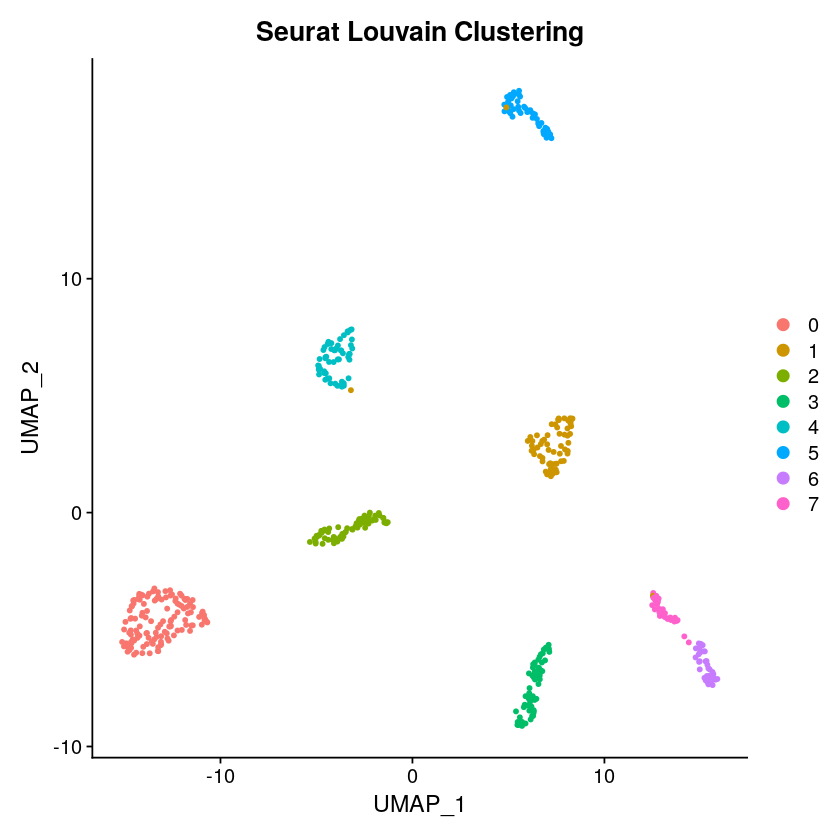

In [1]:
library(Seurat)
library(Matrix)
library(ggplot2)

# === Load matrix and metadata ===
matrix_file <- "/sharedFolder/Data/matrix.mtx.gz"
features_file <- "/sharedFolder/Data/features.tsv.gz"
barcodes_file <- "/sharedFolder/Data/barcodes.tsv.gz"

mat <- readMM(matrix_file)
genes <- readLines(features_file)
barcodes <- readLines(barcodes_file)

rownames(mat) <- genes
colnames(mat) <- barcodes

# === Subsample (optional) ===
set.seed(42)
selected_cells <- sample(colnames(mat), 500)
mat <- mat[, selected_cells]

# === Create Seurat object ===
seurat_obj <- CreateSeuratObject(counts = mat)

# === Standard Seurat pipeline ===
seurat_obj <- NormalizeData(seurat_obj)
seurat_obj <- FindVariableFeatures(seurat_obj)
seurat_obj <- ScaleData(seurat_obj)
seurat_obj <- RunPCA(seurat_obj)

# Cluster using shared nearest neighbor + Louvain
seurat_obj <- FindNeighbors(seurat_obj, dims = 1:10)
seurat_obj <- FindClusters(seurat_obj, resolution = 0.5)

# UMAP for visualization
seurat_obj <- RunUMAP(seurat_obj, dims = 1:10)

# === Plot clustering result ===
DimPlot(seurat_obj, reduction = "umap", group.by = "seurat_clusters") +
  ggtitle("Seurat Louvain Clustering")


In [2]:
# Make sure your Seurat object is already processed with:
# NormalizeData(), FindVariableFeatures(), ScaleData(),
# RunPCA(), FindNeighbors(), FindClusters(), RunUMAP()

# Extract cluster assignments and UMAP coordinates
cell_ids <- colnames(seurat_obj)
clusters <- as.character(Idents(seurat_obj))
umap <- Embeddings(seurat_obj, "umap")

# Combine into a single data frame
df <- data.frame(
  cell = cell_ids,
  cluster = clusters,
  UMAP_1 = umap[, 1],
  UMAP_2 = umap[, 2]
)

# Write to CSV
write.csv(df, "/sharedFolder/seurat_clusters_umap.csv", row.names = FALSE)

cat("✅ CSV file saved as /sharedFolder/seurat_clusters_umap.csv\n")


✅ CSV file saved as /sharedFolder/seurat_clusters_umap.csv


In [3]:
df

,cell,cluster,UMAP_1,UMAP_2
,<chr>,<chr>,<dbl>,<dbl>
TAACGACAGATTGAGT-1_HTB178_HTB178-HTB178,TAACGACAGATTGAGT-1_HTB178_HTB178-HTB178,1,7.177334,2.1089055
AGTAGCTCAGTGTGGA-1_DV90-DV90,AGTAGCTCAGTGTGGA-1_DV90-DV90,4,-3.674946,5.5970413
GACCTTCTCACAGTGT-1_CCL-185-IG-CCL-185-IG,GACCTTCTCACAGTGT-1_CCL-185-IG-CCL-185-IG,0,-14.669492,-5.0354131
TACACCCTCGCTGTCT-1_A549-A549,TACACCCTCGCTGTCT-1_A549-A549,0,-14.615447,-4.0074342
CAGGTATGTGGCTAGA-1_CRL5868-CRL5868,CAGGTATGTGGCTAGA-1_CRL5868-CRL5868,7,13.004762,-4.3113661
CTTCGGTCACAAATGA-1_CCL-185-IG-CCL-185-IG,CTTCGGTCACAAATGA-1_CCL-185-IG-CCL-185-IG,0,-13.524626,-5.6098431
CCTCAACTCCTCAGAA-1_PBMC-PBMCs,CCTCAACTCCTCAGAA-1_PBMC-PBMCs,2,-4.582136,-0.7240651
CTCCCAAAGCCAGAGT-1_A549-A549,CTCCCAAAGCCAGAGT-1_A549-A549,0,-12.867907,-3.3581366
CAACCAAAGACCATGG-1_CCL-185-IG-CCL-185-IG,CAACCAAAGACCATGG-1_CCL-185-IG-CCL-185-IG,0,-12.571991,-4.5925377


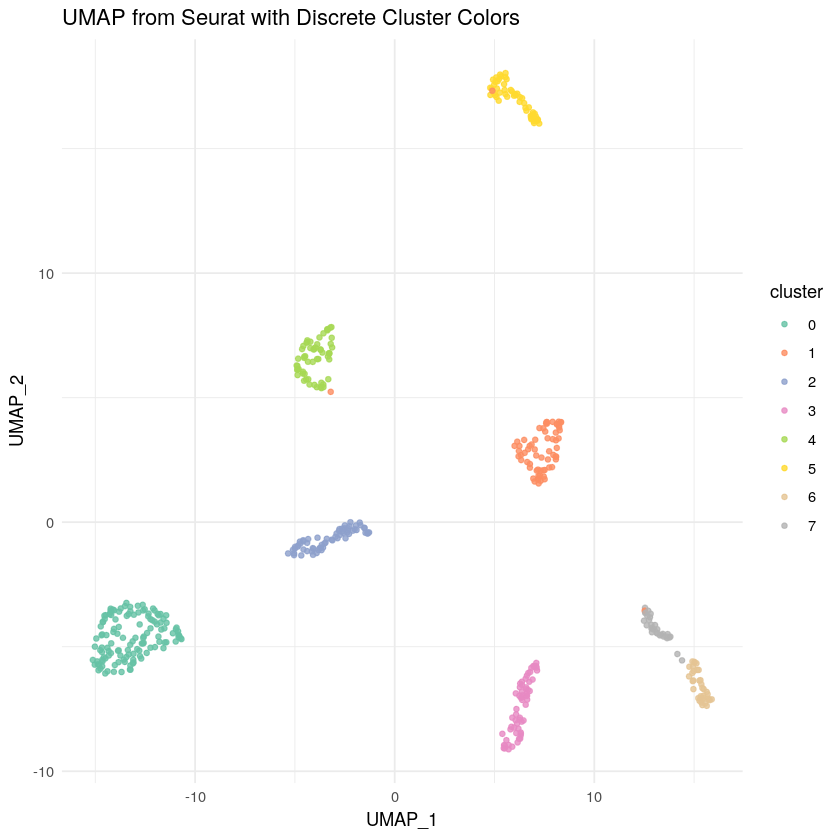

In [4]:
library(ggplot2)

# Load the CSV
df <- read.csv("/sharedFolder/seurat_clusters_umap.csv")

# 🔧 Make sure 'cluster' is treated as categorical
df$cluster <- as.factor(df$cluster)

# Plot with discrete color palette
ggplot(df, aes(x = UMAP_1, y = UMAP_2, color = cluster)) +
  geom_point(alpha = 0.8, size = 1.2) +
  theme_minimal() +
  scale_color_brewer(palette = "Set2") +  # Use "Set1", "Dark2", etc.
  ggtitle("UMAP from Seurat with Discrete Cluster Colors")
